<a href="https://colab.research.google.com/github/msv103/msv103/blob/main/DZ_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

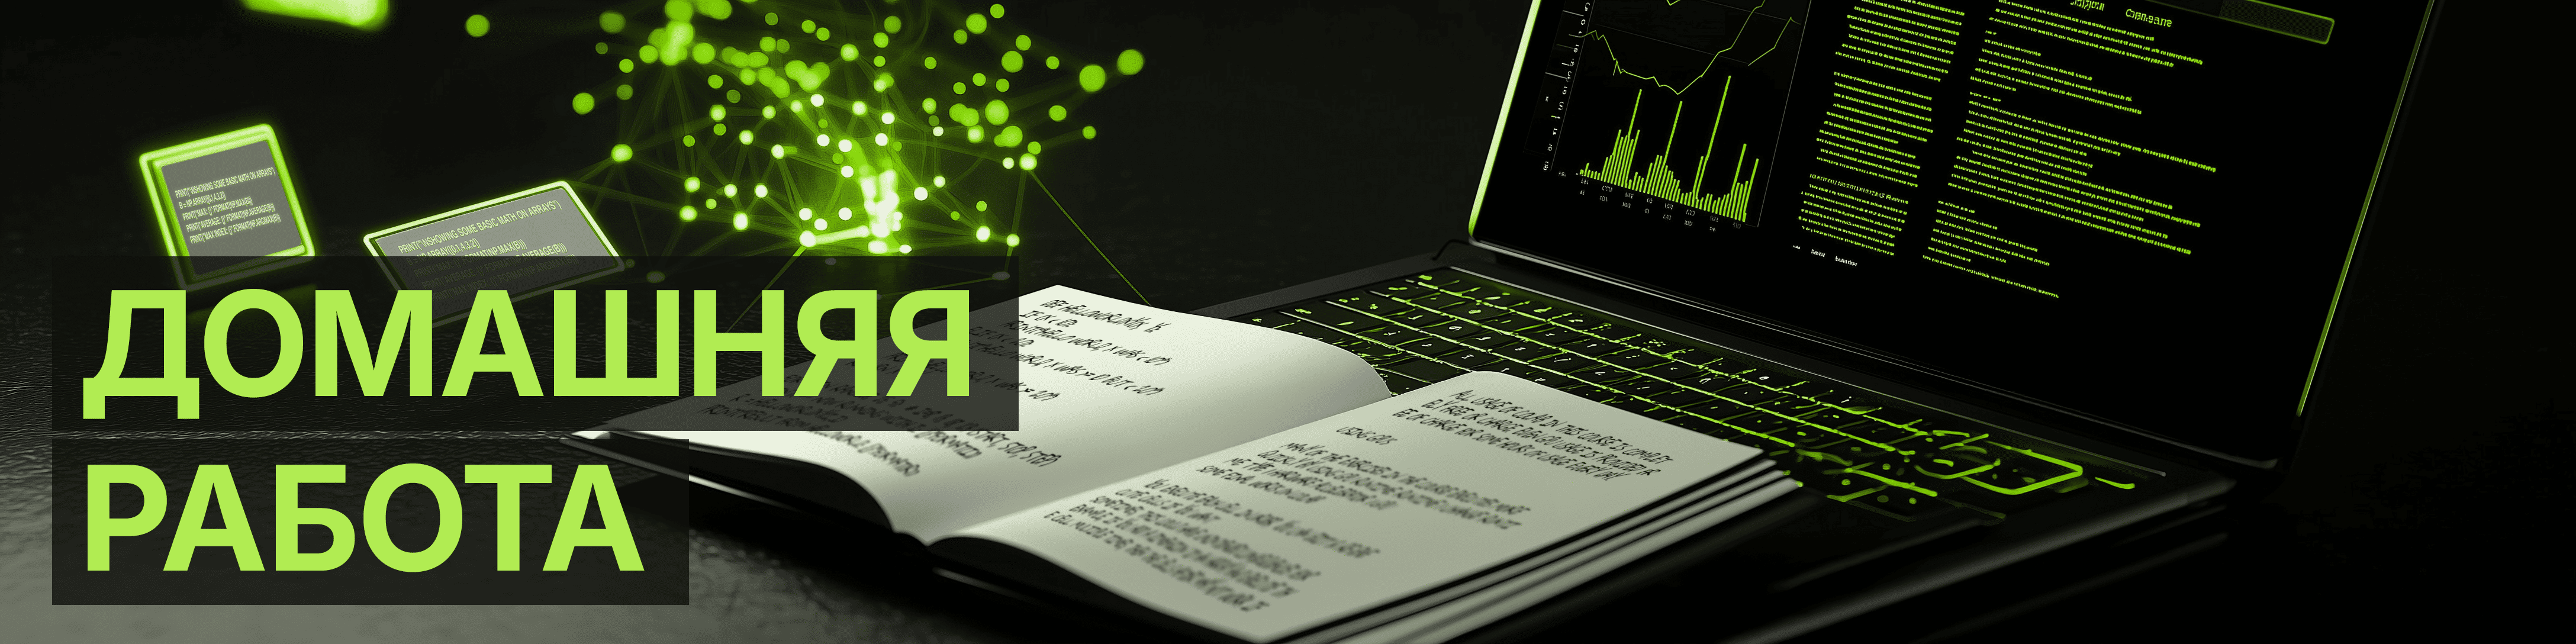

**Навигация по уроку**

1. [Введение в Data Science](https://colab.research.google.com/drive/1OzEE1Y-T_p8rqJHxAm7S8iO76Hx6Jox3)
2. [Поиск, сбор и первичная обработка данных](https://colab.research.google.com/drive/1sPc9RcTh9oMzyLffhNorD-Hh2kQlMhCC)
3. Домашняя работа

## Задача 1. Книги без буквы E.

**Условие.** В истории литературы известен случай написания романа объемом около
50 тыс. слов, в котором ни разу не была употреблена самая популярная
в английском алфавите буква E. Название его – «Gadsby».
Напишите программу, которая будет считывать список слов из файла и собирать статистику о том, в каком проценте слов используется каждая буква алфавита. Выведите результат для всех 26 букв английского алфавита и отдельно отметьте букву, которая встречалась в словах наиболее редко. В  вашей программе должны игнорироваться знаки препинания и регистр символов.


**Подсказки.**
1. Переведите все слова в верхний регистр:
```
word = word.upper().rstrip() # upper - переводит строку в верхний регистр
```
2. Создайте словарь со счетчиком слов, содержащий каждую букву
```
# Для каждой буквы инициализируем счетчик нулем
counts = {}
for ch in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
       counts[ch] = 0
```
3. Наиболее редко используемые буквы можно найти следующим образом:
```
smallest_count = min(counts.values()) # min - возвращает наименьшее число в списке
```

In [ ]:
file = open("input.txt", "w") # мы открыли файл для записи, если он уже создан, то будет перезаписан
# Для работы с многострочным текстом, его необходимо заключить в тройные одинарные кавычки.

text = '''My dream is to become a successful doctor. Growing up, I always had a fascination with the human body and how it works. I loved learning about different diseases and how they can be treated, and I always knew that I wanted to work in the medical field.
As I grew up, I realized that becoming a doctor was not going to be easy. It requires a lot of hard work and dedication, but I am more than willing to put in the effort to achieve my dream. I know that becoming a doctor will require a lot of schooling and training, but I am ready for the challenge.
My dream is to use my medical skills to help people. I want to be able to make a difference in the lives of others. I believe that being a doctor is not just a profession, but a calling, and I am eager to answer that call.
I am grateful to have the opportunity to pursue my dream, and I am determined to work hard and do whatever it takes to make it a reality. I know that the path to becoming a doctor will be challenging, but I am up for the challenge. I am confident that with hard work and determination, I can achieve my dream of becoming a successful doctor.'''
# мы получили в переменную file дескриптор файла (ссылку на файл) и теперь по нему можем работать с файлом
file.write(text) # Записываем текст целиком в файл
file.close()


In [ ]:
def get_key(d, value): # функция возвращает ключ по значению
    for k, v in d.items():
        if v == value:
            return k

def show_percentages_of_letters(text):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    words = text.upper().split()
    num_all_words = len(words)

    counts = {}
    percentages = {}

    for ch in alphabet:
        counts[ch] = 0

    for word in words: # считаем кол-во слов, где присутствует буква
        unique_elements_of_word = set(word)
        for letter in unique_elements_of_word:
            if alphabet.find(letter) != -1:
                counts[letter] += 1

    for ch in alphabet:
        percentages[ch] = round(counts[ch] / num_all_words * 100, 2)
        print(ch + ": " + str(percentages[ch]) + "%")

    smallest_count = min(counts.values())
    print("Буква, встречающаяся наиболее редко -",
          get_key(counts ,smallest_count))

with open("input.txt", 'r') as file:
    text = file.read()
    show_percentages_of_letters(text)



A: 38.74%
B: 8.11%
C: 13.06%
D: 18.47%
E: 32.43%
F: 7.21%
G: 8.11%
H: 16.67%
I: 30.18%
J: 0.45%
K: 5.41%
L: 13.06%
M: 13.96%
N: 21.62%
O: 27.93%
P: 4.5%
Q: 0.9%
R: 20.27%
S: 10.81%
T: 32.88%
U: 8.56%
V: 3.15%
W: 10.81%
X: 0.0%
Y: 6.31%
Z: 0.45%
Буква, встречающаяся наиболее редко - X


## Задание 2. Веб-скрейпинг ИИ новостей

**Описание задания.** Используя пример веб-скрейпинга практической части урока, проведите скрейпинг сайта с новостями из сферы ИИ (https://2051.vision/category/ii/), выведите на экран заголовки новостей.

In [ ]:
!pip install beautifulsoup4 requests html5lib #установим недостающие библиотеки

In [ ]:
from bs4 import BeautifulSoup
import requests

# Получим с сайта RBС топ свежих новостей

url = ("https://2051.vision/category/ii/") # Зададим адрес новостного сайта для GET-запроса библиотеки requests
html = requests.get(url).text # Извлекаем из тела ответа текстовые данные
soup = BeautifulSoup(html, 'html5lib') # Применяем к данным анализатор html5lib

top_news = soup.find_all('h3', class_='entry-title')
filteredNews = []

for data in top_news:
    if data.find('a') is not None:
        filteredNews.append(data.text.strip())


for i, news in enumerate(filteredNews):
    print(i+1, news)


1 70% коммуникаций в «Аэрофлоте» к 2030 году будет осуществляться при помощи ИИ
2 Специально для МКС разработали нейросеть
3 ИИ приведет человечество к катастрофе? Дело в экологии, а не сверхразуме
4 ИИ приведет человечество к процветанию?
5 Врет и не краснеет: o1 от OpenAI поймали на лжи и манипуляциях
6 OpenAI выпустила ИИ для решения действительно сложных проблем
7 Adobe представила ИИ для генерации видео
8 ИИскусство: новые возможности или хождение по кругу?
9 Google научила ИИ диагностировать болезни по звукам дыхания
10 Нейросеть восстановит второй том «Мертвых душ»
11 Роботы спустятся в недра Марса и Луны? Испытания технологии прошли на Лансароте
12 Blue Origin объявила о запуске беспилотной миссии New Shepard NS-35
13 Midnight компании Archer Aviation установил рекорд
14 Китайские тайконавты готовятся к третьему выходу в открытый космос
